# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import os
import seaborn as sns


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
!unzip -o titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
file_path = 'train.csv'
try:
    df = pd.read_csv(file_path)
    print("Data berhasil dimuat. Berikut 5 baris pertama:")
    df.head()
except FileNotFoundError:
    print(f"ERROR: File '{file_path}' masih tidak ditemukan.")
    print("Coba jalankan sel kode yang berisi '!unzip -o titanic.zip' sekali lagi.")

Data berhasil dimuat. Berikut 5 baris pertama:


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

--- Informasi Umum Dataset (Tipe Data & Nilai Non-Null) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


--- Statistik Deskriptif (hanya untuk kolom numerik) ---
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000 

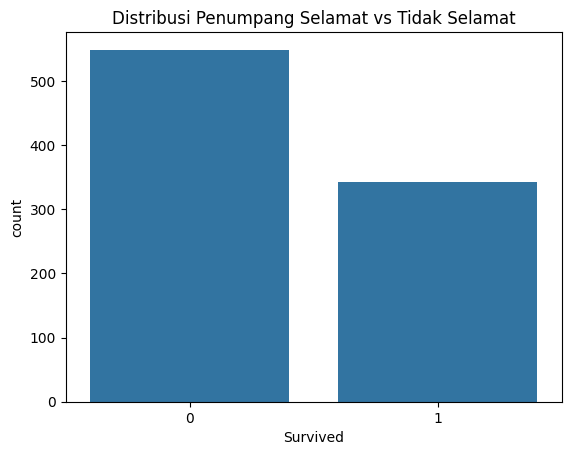



--- Visualisasi: 'Survived' berdasarkan 'Sex' ---


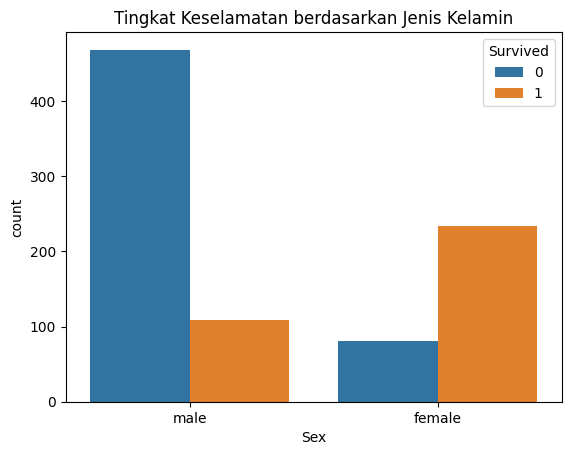



--- Visualisasi: 'Survived' berdasarkan 'Pclass' (Kelas Tiket) ---


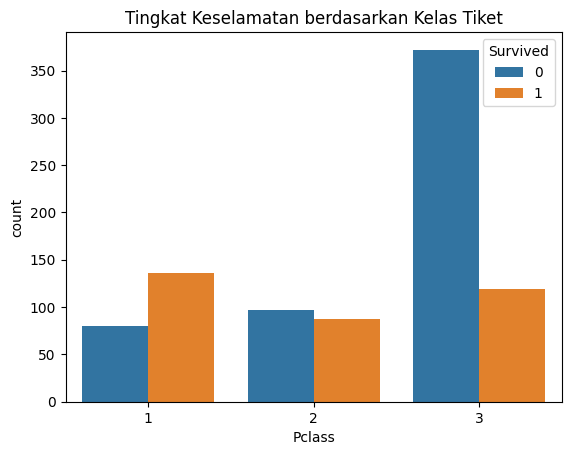



--- Visualisasi: Distribusi Usia (Age) ---


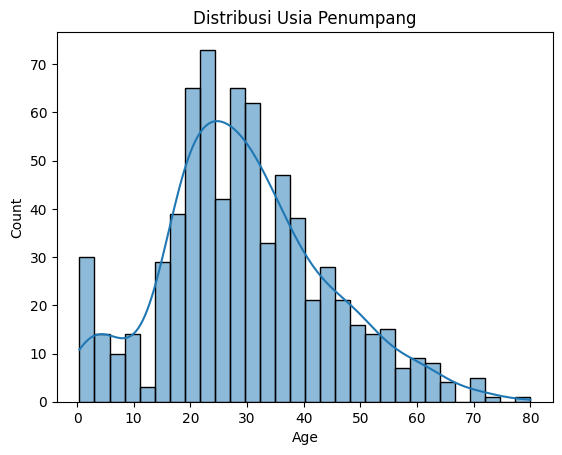



--- Visualisasi: Heatmap Korelasi ---


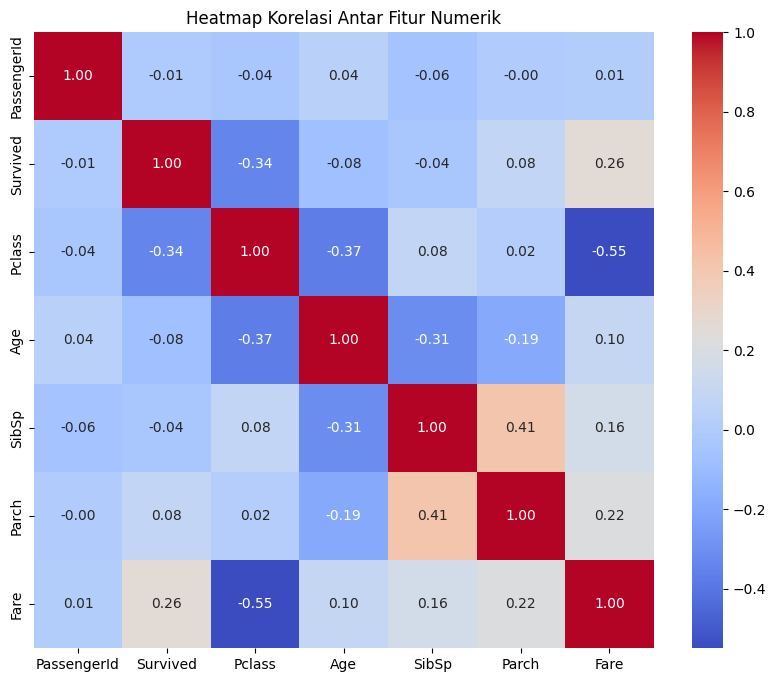

In [4]:
print("--- Informasi Umum Dataset (Tipe Data & Nilai Non-Null) ---")

df.info()

print("\n\n--- Statistik Deskriptif (hanya untuk kolom numerik) ---")
print(df.describe())

print("\n\n--- Jumlah Data Hilang (Missing Values) per Kolom ---")
print(df.isnull().sum())

print("\n\n--- Visualisasi: Distribusi Target (Survived) ---")
sns.countplot(x='Survived', data=df)
plt.title('Distribusi Penumpang Selamat vs Tidak Selamat')
plt.show()


print("\n\n--- Visualisasi: 'Survived' berdasarkan 'Sex' ---")
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Tingkat Keselamatan berdasarkan Jenis Kelamin')
plt.show()

print("\n\n--- Visualisasi: 'Survived' berdasarkan 'Pclass' (Kelas Tiket) ---")
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Tingkat Keselamatan berdasarkan Kelas Tiket')
plt.show()

print("\n\n--- Visualisasi: Distribusi Usia (Age) ---")
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Distribusi Usia Penumpang')
plt.show()


print("\n\n--- Visualisasi: Heatmap Korelasi ---")
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [5]:
df_clean = df.copy()


age_median = df_clean['Age'].median()
df_clean['Age'] = df_clean['Age'].fillna(age_median)

embarked_mode = df_clean['Embarked'].mode()[0]
df_clean['Embarked'] = df_clean['Embarked'].fillna(embarked_mode)

df_clean = df_clean.drop('Cabin', axis=1)

print("--- Data setelah menangani missing values ---")
print(df_clean.isnull().sum())
print("\n")

df_clean = df_clean.drop_duplicates()

df_clean = pd.get_dummies(df_clean, columns=['Sex'], drop_first=True)

df_clean = pd.get_dummies(df_clean, columns=['Embarked'], prefix='Port')

scaler = StandardScaler()
df_clean[['Age', 'Fare']] = scaler.fit_transform(df_clean[['Age', 'Fare']])

df_clean = df_clean.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

print("--- DATA BERSIH (FINAL) ---")
print("Data 5 baris pertama setelah dibersihkan:")
print(df_clean.head())
print("\nInfo data setelah dibersihkan (semua harus numerik & tidak ada null):")
df_clean.info()

--- Data setelah menangani missing values ---
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


--- DATA BERSIH (FINAL) ---
Data 5 baris pertama setelah dibersihkan:
   Survived  Pclass       Age  SibSp  Parch      Fare  Sex_male  Port_C  \
0         0       3 -0.565736      1      0 -0.502445      True   False   
1         1       1  0.663861      1      0  0.786845     False    True   
2         1       3 -0.258337      0      0 -0.488854     False   False   
3         1       1  0.433312      1      0  0.420730     False   False   
4         0       3  0.433312      0      0 -0.486337      True   False   

   Port_Q  Port_S  
0   False    True  
1   False   False  
2   False    True  
3   False    True  
4   False    True  

Info data setelah dibersihkan (semua harus numerik & tidak ada null):
<class 'pandas.core.frame.DataFrame'>
Ra

In [6]:
!mkdir -p namadataset_preprocessing

In [7]:

def preprocess_data(df):
    """
    Fungsi ini mengambil DataFrame Titanic mentah
    dan mengembalikan DataFrame yang sudah bersih.
    """

    print("Memulai preprocessing...")
    df_clean = df.copy()

    age_median = df_clean['Age'].median()
    df_clean['Age'] = df_clean['Age'].fillna(age_median)

    embarked_mode = df_clean['Embarked'].mode()[0]
    df_clean['Embarked'] = df_clean['Embarked'].fillna(embarked_mode)

    if 'Cabin' in df_clean.columns:
        df_clean = df_clean.drop('Cabin', axis=1)
    df_clean = df_clean.drop_duplicates()

    if 'Sex' in df_clean.columns:
        df_clean = pd.get_dummies(df_clean, columns=['Sex'], drop_first=True)
    if 'Embarked' in df_clean.columns:
        df_clean = pd.get_dummies(df_clean, columns=['Embarked'], prefix='Port')

    scaler = StandardScaler()

    cols_to_scale = ['Age', 'Fare']

    for col in cols_to_scale:
        if col in df_clean.columns:

            pass

    df_clean[cols_to_scale] = scaler.fit_transform(df_clean[cols_to_scale])

    cols_to_drop = ['PassengerId', 'Name', 'Ticket']
    for col in cols_to_drop:
        if col in df_clean.columns:
            df_clean = df_clean.drop(col, axis=1)

    print("Preprocessing selesai.")
    return df_clean

if __name__ == "__main__":


    input_path = 'train.csv'
    output_folder = 'namadataset_preprocessing'
    output_path = os.path.join(output_folder, 'train_cleaned.csv')


    print(f"Mencoba memuat data dari: {input_path}")

    try:

        raw_df = pd.read_csv(input_path)
        print("Data mentah berhasil dimuat.")

        cleaned_df = preprocess_data(raw_df)

        os.makedirs(output_folder, exist_ok=True)

        cleaned_df.to_csv(output_path, index=False)

        print(f"\nData bersih berhasil disimpan di: {output_path}")
        print("--- Script automate.py berhasil dijalankan ---")

    except FileNotFoundError:
        print(f"ERROR: File tidak ditemukan di {input_path}")
        print("Pastikan file 'train.csv' ada di folder yang benar.")
    except Exception as e:
        print(f"Terjadi error: {e}")

Mencoba memuat data dari: train.csv
Data mentah berhasil dimuat.
Memulai preprocessing...
Preprocessing selesai.

Data bersih berhasil disimpan di: namadataset_preprocessing/train_cleaned.csv
--- Script automate.py berhasil dijalankan ---


In [8]:

file_content = """
import time

print("Memulai proses di dalam file automate.py...")
time.sleep(1)
print("Proses di dalam file selesai.")
"""
file_name = "automate.py"
with open(file_name, "w") as f:
    f.write(file_content)

print(f"\n--- File '{file_name}' berhasil dibuat! ---")

print(f"--- Menjalankan !python {file_name} ---")
!python {file_name}


--- File 'automate.py' berhasil dibuat! ---
--- Menjalankan !python automate.py ---
Memulai proses di dalam file automate.py...
Proses di dalam file selesai.


In [9]:
# Perintah ini untuk 'melihat isi' folder
!ls

automate.py	       namadataset_preprocessing  test.csv     train.csv
gender_submission.csv  sample_data		  titanic.zip


In [11]:
!zip /content/namadataset_preprocessing.zip -r /content/namadataset_preprocessing

  adding: content/namadataset_preprocessing/ (stored 0%)
  adding: content/namadataset_preprocessing/train_cleaned.csv (deflated 86%)
